In [1]:
import pandas as pd

In [2]:
hour = pd.read_csv('hour.csv')

In [3]:
print(hour.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  count  
0           1  0.24  0.2879  0.81        0.0       3          13     16  
1           1  0.22  0.2727  0.80        0.0       8          32     40  
2           1  0.22  0.2727  0.80        0.0       5          27     32  
3           1  0.24  0.2879  0.75        0.0       3          10     13  
4           1  0.24  0.2879  0.75        0.0       0           1      1  


In [4]:
hour.shape

(17379, 17)

In [5]:
hour['count'].mean()

189.46308763450142

In [6]:
hour['count'].median()

142.0

In [7]:
hour['count'].std()

181.38759909186527

In [8]:
hour['registered'].min()

0

In [9]:
hour['registered'].max()

886

In [10]:
hour['count'].sum()

3292679

In [11]:
hourly_charge = 5.0
print(hourly_charge * hour['count'].sum())

16463395.0


In [12]:
hour.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

              count  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [15]:
hour.loc[3, 'count']

13

In [16]:
# obtaining a subset consisting of multiple rows and columns
hour.loc[2:4, 'registered']

2    27
3    10
4     1
Name: registered, dtype: int64

In [17]:
hour.loc[hour['hr'] < 5, 'registered'].mean()

20.7881427367238

In [18]:
hour.loc[(hour['hr']<5) & (hour['temp']<.50),'count'].mean()

19.521104742053154

In [19]:
hour.loc[(hour['hr']<5) & (hour['temp']>.50),'count'].mean()

33.639322916666664

In [20]:
hour.loc[(hour['hr']<5) & (hour['temp']<.25),'count'].mean()

11.287878787878787

In [21]:
hour.loc[(hour['temp']>0.5) | (hour['hum']>0.5),'count'].mean()

193.36764103264582

In [23]:
hour.groupby(['season'])['count'].mean()

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: count, dtype: float64

In [24]:
hour.groupby(['season', 'holiday'])['count'].mean()

season  holiday
1       0          112.685875
        1           72.042683
2       0          208.428472
        1          204.552083
3       0          235.976818
        1          237.822917
4       0          199.965998
        1          167.722222
Name: count, dtype: float64

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

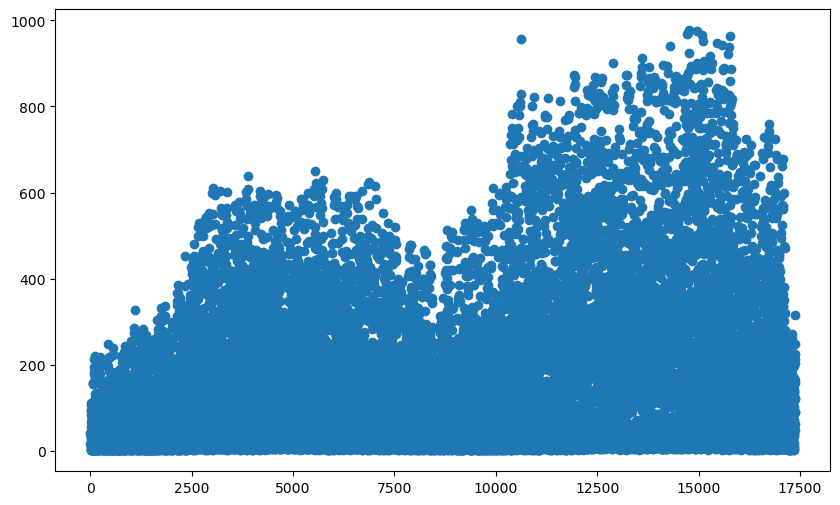

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x = hour['instant'], y = hour['count'])
plt.show()

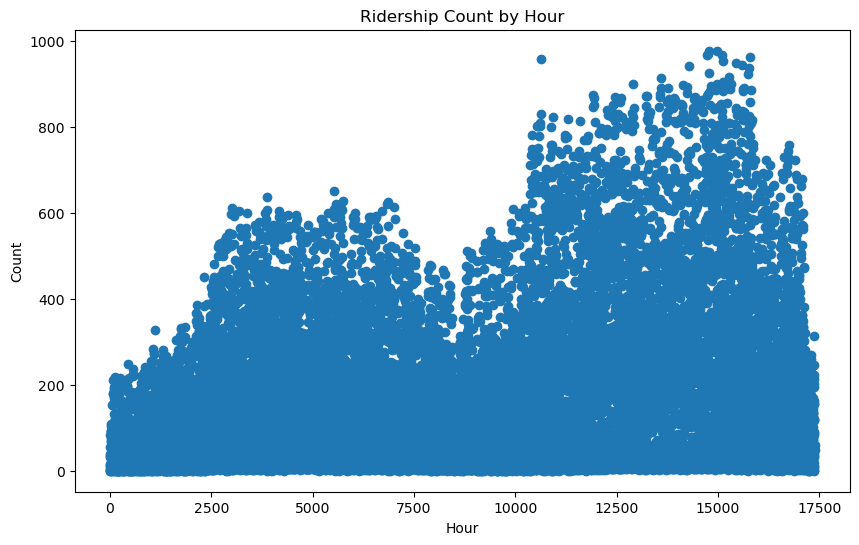

In [27]:
# Clarifying Plots with Titles and Labels
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x = hour['instant'], y=hour['count'])
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Ridership Count by Hour")
plt.show()

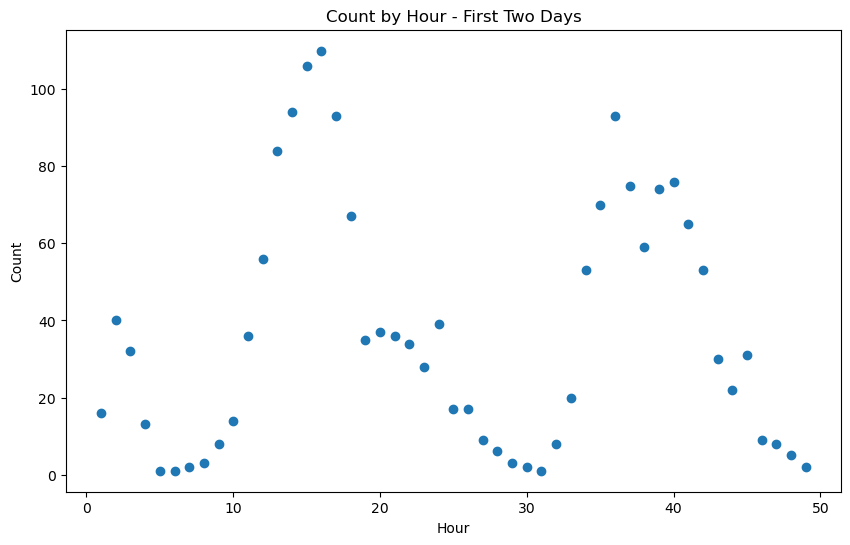

In [29]:
# Plotting Subsets of Data
hour_first48= hour.loc[0:48, :]
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x = hour_first48['instant'], y=hour_first48['count'])
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Count by Hour - First Two Days")
plt.show()

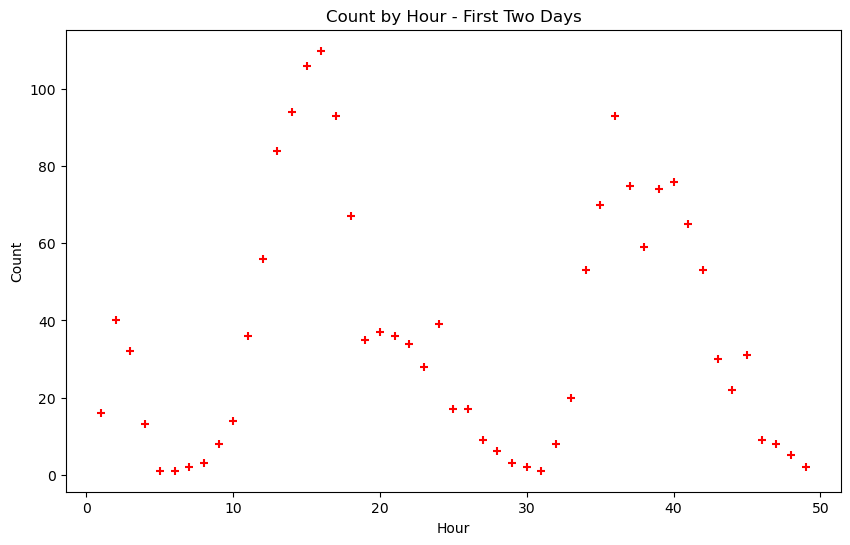

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = hour_first48['instant'], y = hour_first48['count'],c='red',marker='+')
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Count by Hour - First Two Days")
plt.show()

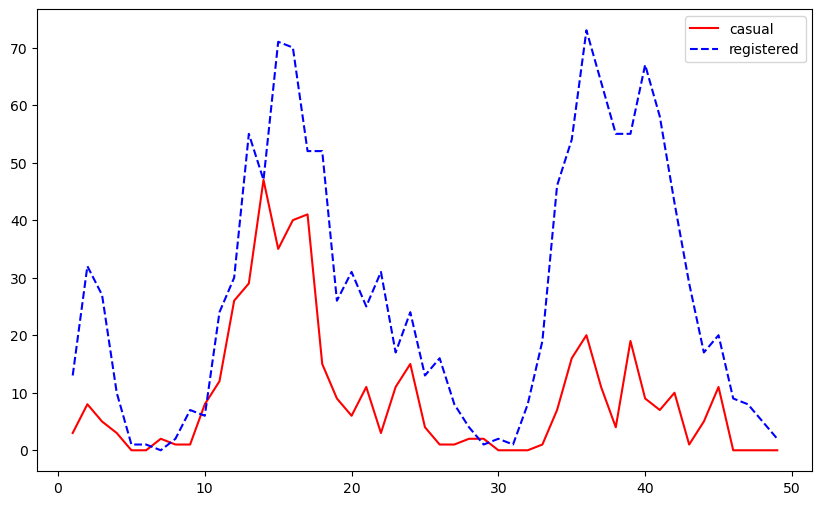

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(hour_first48['instant'], hour_first48['casual'],c='red',label='casual',linestyle='-')
ax.plot(hour_first48['instant'], hour_first48['registered'],c='blue',label='registered',linestyle='--')
ax.legend()
plt.show()

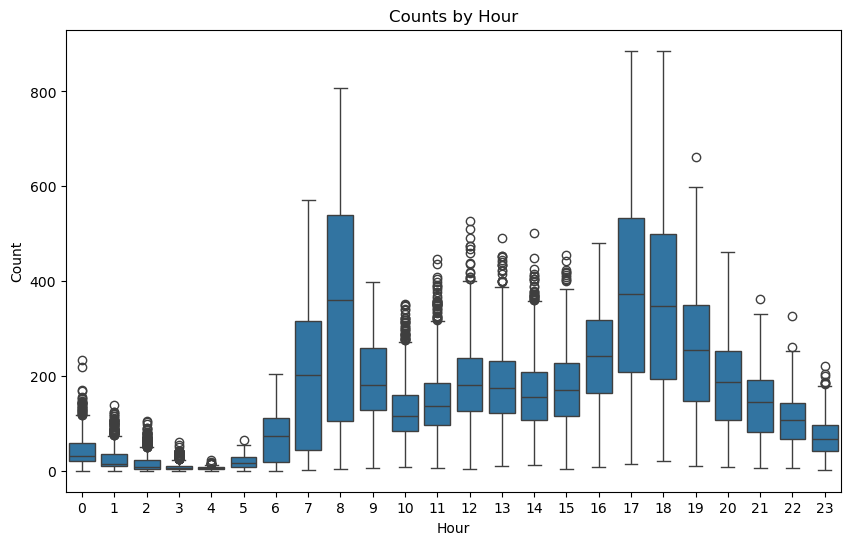

In [32]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x = 'hr', y = 'registered', data = hour)
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Counts by Hour")
plt.show()

In [33]:
busy_hour = hour[hour["count"] >= 800]

In [34]:
busy_hour

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
10527    10528  2012-03-19       1   1     3  18        0        1   
10551    10552  2012-03-20       1   1     3  18        0        2   
10598    10599  2012-03-22       2   1     3  17        0        4   
10599    10600  2012-03-22       2   1     3  18        0        4   
10622    10623  2012-03-23       2   1     3  17        0        5   
...        ...         ...     ...  ..   ...  ..      ...      ...   
15780    15781  2012-10-24       4   1    10  17        0        3   
15781    15782  2012-10-24       4   1    10  18        0        3   
15804    15805  2012-10-25       4   1    10  17        0        4   
15805    15806  2012-10-25       4   1    10  18        0        4   
15828    15829  2012-10-26       4   1    10  17        0        5   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
10527           1           1  0.64  0.6212  0.57     0.2537     120   
10551           1           1  0.60  0.5909  0.69     0.2537     136   
10598           1           1  0.66  0.6212  0.65     0.1642     154   
10599           1           1  0.66  0.6212  0.65     0.1642     147   
10622           1           2  0.72  0.6515  0.42     0.1642     264   
...           ...         ...   ...     ...   ...        ...     ...   
15780           1           1  0.66  0.6212  0.47     0.0000      87   
15781           1           1  0.66  0.6212  0.44     0.0000      63   
15804           1           1  0.60  0.5909  0.69     0.1642     112   
15805           1           1  0.56  0.5303  0.83     0.1045      77   
15828           1           2  0.56  0.5303  0.76     0.1940     125   

       registered  count  
10527         681    801  
10551         665    801  
10598         656    810  
10599         654    801  
10622         693    957  
...           ...    ...  
15780         876    963  
15781         795    858  
15804         774    886  
15805         732    809  
15828         692    817  

[149 rows x 17 columns]

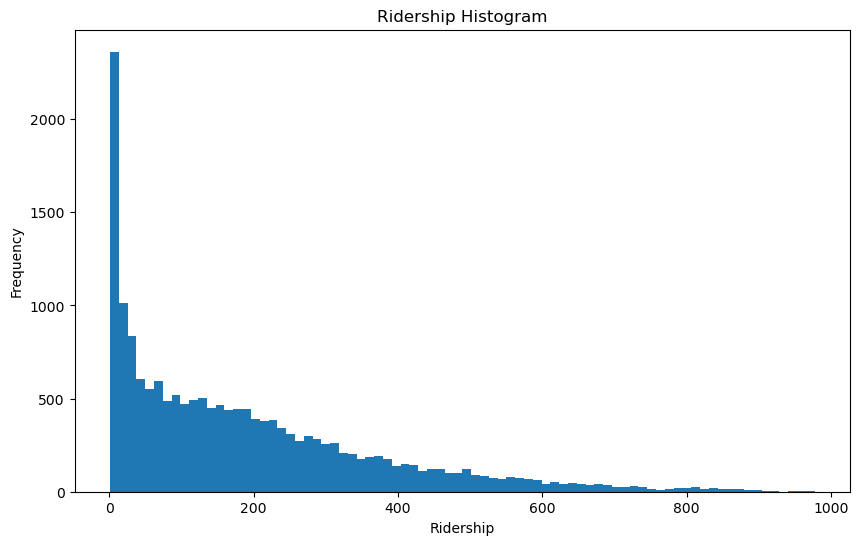

In [35]:
# histogram
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(hour['count'], bins=80)
plt.xlabel("Ridership")
plt.ylabel("Frequency")
plt.title("Ridership Histogram")
plt.show()

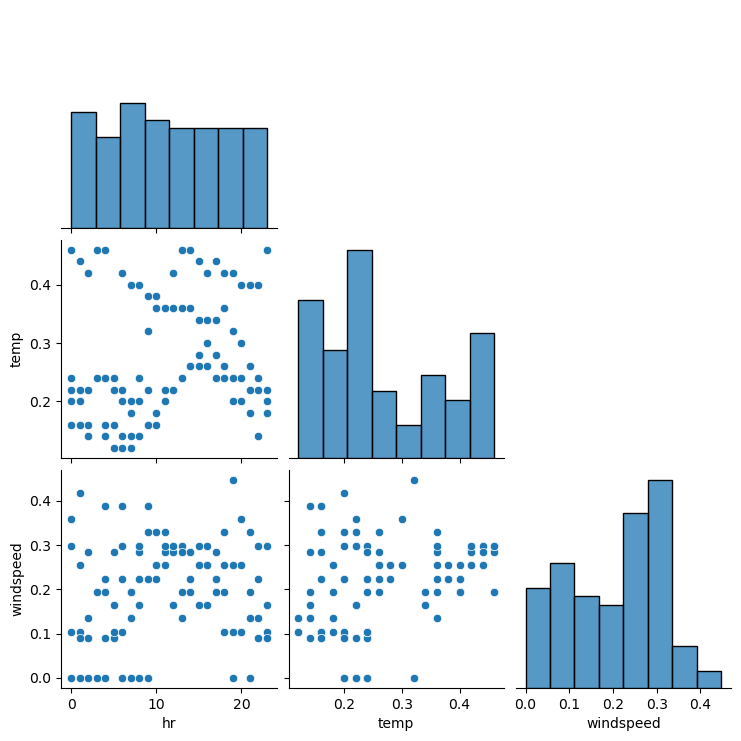

In [36]:
thevariables=['hr','temp','windspeed']
hour_first100=hour.loc[0:100,thevariables]
sns.pairplot(hour_first100, corner=True)
plt.show()

In [38]:
# calculating correlations
hour['casual'].corr(hour['registered'])

0.5066177004294637

In [39]:
hour['temp'].corr(hour['hum'])

-0.06988139105119355

In [40]:
hour['temp'].corr(hour['count'])

0.4047722757786586

In [41]:
hour['hum'].corr(hour['count'])

-0.32291074082456045

In [43]:
hour['season'].corr(hour['count'])

0.17805573098267535

In [44]:
thenames=['hr','temp','windspeed']
cor_matrix = hour[thenames].corr()
cor_matrix

hr      temp  windspeed
hr         1.000000  0.137603   0.137252
temp       0.137603  1.000000  -0.023125
windspeed  0.137252 -0.023125   1.000000

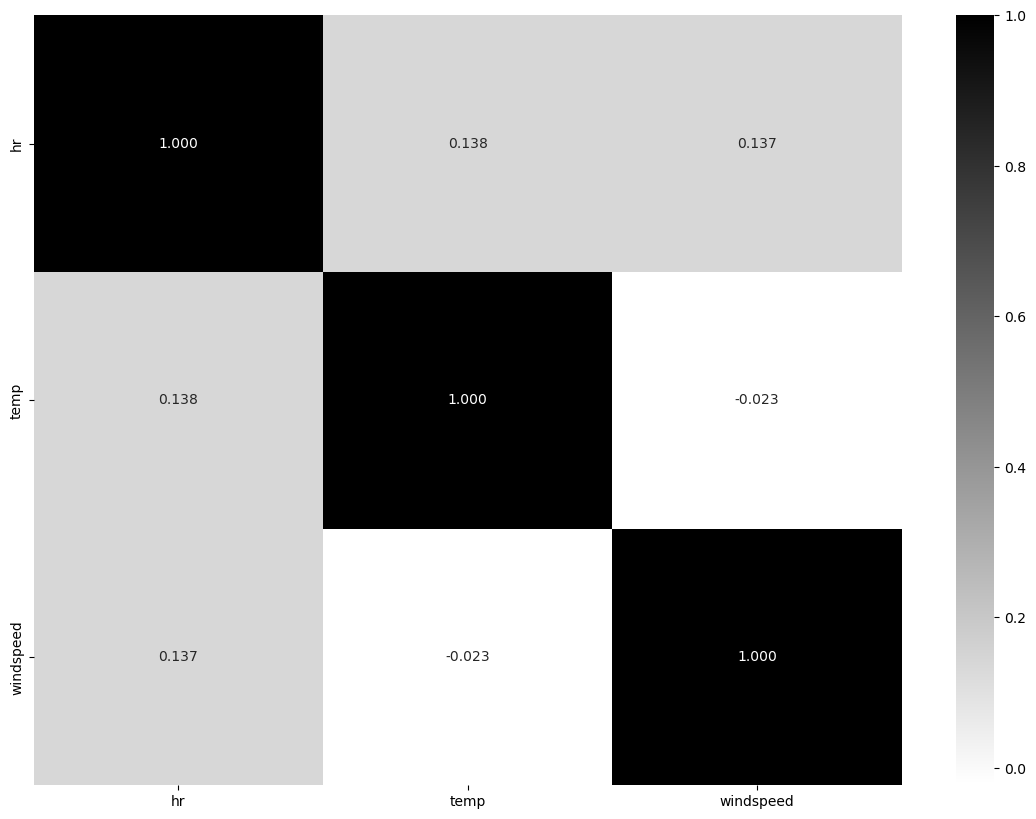

In [46]:
plt.figure(figsize=(14,10))
corr = hour[thenames].corr()
sns.heatmap(corr, annot=True,cmap='binary',
        fmt=".3f",
        xticklabels=thenames,
        yticklabels=thenames)
plt.show()

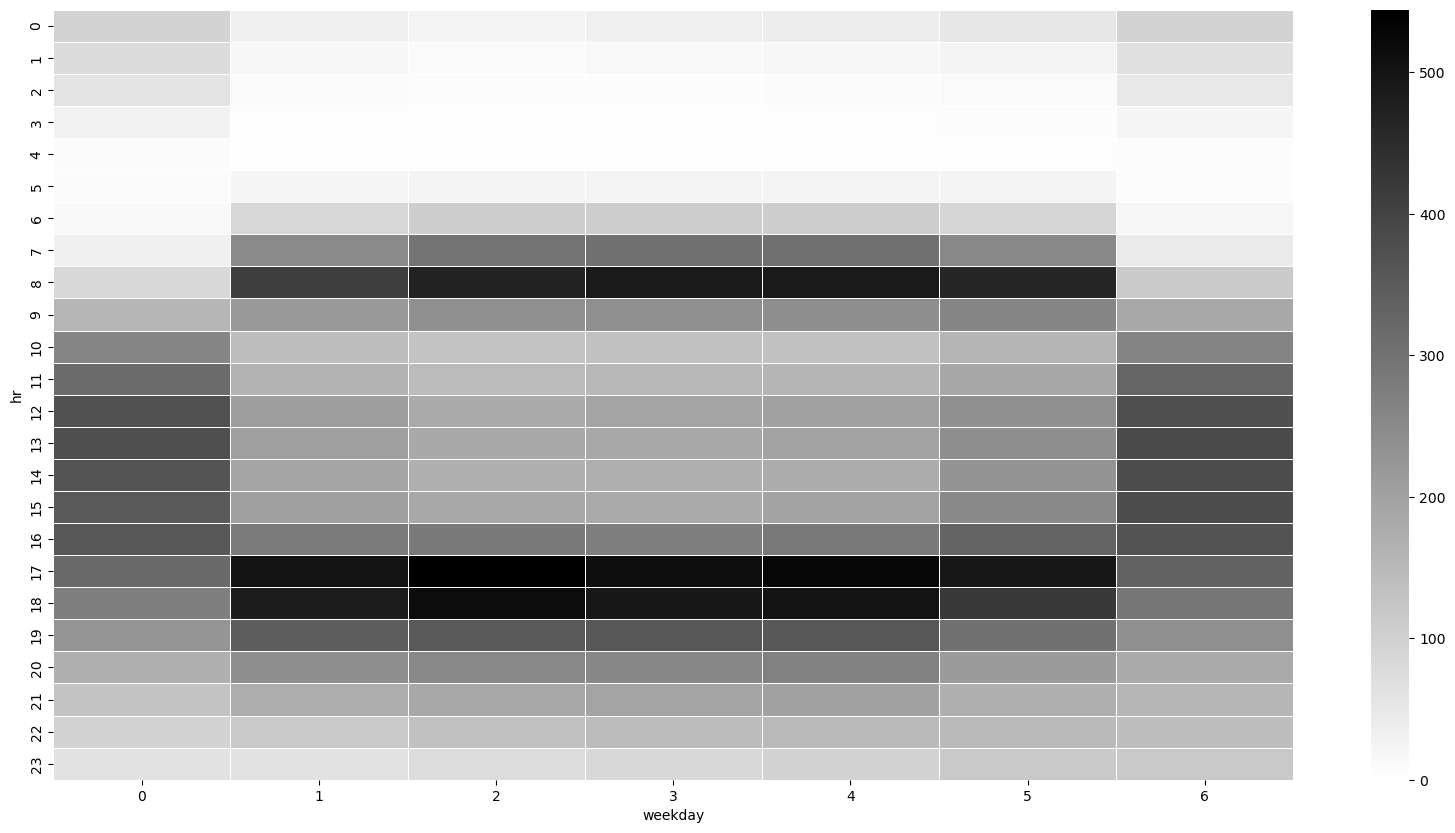

In [49]:
# A heat map showing the number of riders at each hour throughout the week
df_hm = hour.pivot_table(index='hr', columns='weekday', values = 'count')

plt.figure(figsize=(20,10)) #To resize the plot
sns.heatmap(df_hm, fmt="d", cmap="binary", linewidths=.5, vmin=0)
plt.show()